# Support Vector Machines
## SVM - Regression

The data set consists of various cement properties and the resulting slump test metrics in cm. Later on the set concrete is tested for its compressive strength 28 days later.

Data Source: https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test

Input variables (7)(component kg in one M^3 concrete):
* Cement
* Slag
* Fly ash
* Water
* SP
* Coarse Aggr.
* Fine Aggr.

Output variables (3):
* SLUMP (cm)
* FLOW (cm)
* **28-day Compressive Strength (Mpa)**



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read in file and create a dataframe
df = pd.read_csv('../DATA/cement_slump.csv')

In [3]:
# display column labels
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

In [4]:
# Display top 5 rows
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [5]:
# Display information about a DataFrame including 
# the index dtype and columns, non-null values and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
Cement                                103 non-null float64
Slag                                  103 non-null float64
Fly ash                               103 non-null float64
Water                                 103 non-null float64
SP                                    103 non-null float64
Coarse Aggr.                          103 non-null float64
Fine Aggr.                            103 non-null float64
SLUMP(cm)                             103 non-null float64
FLOW(cm)                              103 non-null float64
Compressive Strength (28-day)(Mpa)    103 non-null float64
dtypes: float64(10)
memory usage: 8.1 KB


In [6]:
# Display descriptive statistics
df.describe()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.00000,103.000000
mean,229.894175,77.973786,149.014563,197.167961,8.539806,883.978641,739.604854,18.048544,49.61068,36.038738
std,78.877230,60.461363,85.418080,20.208158,2.807530,88.391393,63.342117,8.750844,17.56861,7.837120
min,137.000000,0.000000,0.000000,160.000000,4.400000,708.000000,640.600000,0.000000,20.00000,17.190000
25%,152.000000,0.050000,115.500000,180.000000,6.000000,819.500000,684.500000,14.500000,38.50000,30.900000
50%,248.000000,100.000000,164.000000,196.000000,8.000000,879.000000,742.700000,21.500000,54.00000,35.520000
75%,303.900000,125.000000,235.950000,209.500000,10.000000,952.800000,788.000000,24.000000,63.75000,41.205000
max,374.000000,193.000000,260.000000,240.000000,19.000000,1049.900000,902.000000,29.000000,78.00000,58.530000


In [7]:
# explore correlation between "Compressive Strength" and other features
df.corr()['Compressive Strength (28-day)(Mpa)']

Cement                                0.445656
Slag                                 -0.331522
Fly ash                               0.444380
Water                                -0.254320
SP                                   -0.037909
Coarse Aggr.                         -0.160610
Fine Aggr.                           -0.154532
SLUMP(cm)                            -0.223499
FLOW(cm)                             -0.124189
Compressive Strength (28-day)(Mpa)    1.000000
Name: Compressive Strength (28-day)(Mpa), dtype: float64

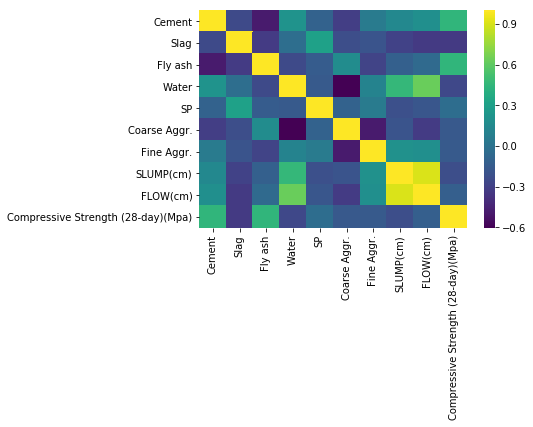

In [8]:
sns.heatmap(df.corr(), cmap='viridis')

In [10]:
# display columns' titles
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

## Train | Test Split

Alternatively you could also set this up as a pipline, something like:

    >>> from sklearn.pipeline import make_pipeline
    >>> from sklearn.preprocessing import StandardScaler
    >>> from sklearn.svm import SVR

    >>> clf = make_pipeline(StandardScaler(), SVR())

In [11]:
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

In [12]:
# features and target
X = df.drop('Compressive Strength (28-day)(Mpa)',axis=1)
y = df['Compressive Strength (28-day)(Mpa)']

In [13]:
# import train_test_split
from sklearn.model_selection import train_test_split

In [14]:
# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [15]:
# import StandardScaler 
from sklearn.preprocessing import StandardScaler

In [39]:
# create object
scaler = StandardScaler()

In [40]:
# fit, transform, and scale data
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Support Vector Machines - Regression

There are three different implementations of Support Vector Regression: SVR, NuSVR and LinearSVR. LinearSVR provides a faster implementation than SVR but only considers the linear kernel, while NuSVR implements a slightly different formulation than SVR and LinearSVR. See [Implementation details](https://scikit-learn.org/stable/modules/svm.html#svm-implementation-details) for further details.

In [18]:
from sklearn.svm import SVR,LinearSVR

Setting C: C is 1 by default and it’s a reasonable default choice. If you have a lot of noisy observations you should decrease it: decreasing C corresponds to more regularization.

LinearSVC and LinearSVR are less sensitive to C when it becomes large, and prediction results stop improving after a certain threshold. Meanwhile, larger C values will take more time to train, sometimes up to 10 times longer

Epsilon: https://stats.stackexchange.com/questions/259018/meaning-of-epsilon-in-svm-regression

In [41]:
base_model = SVR()

In [42]:
base_model.fit(scaled_X_train,y_train)

SVR()

In [43]:
base_preds = base_model.predict(scaled_X_test)

## Evaluation

In [44]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [45]:
mean_absolute_error(y_test,base_preds)

5.236902091259179

In [46]:
np.sqrt(mean_squared_error(y_test,base_preds))

6.695914838327133

In [47]:
y_test.mean()

36.26870967741935

## Grid Search in Attempt for Better Model

In [48]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1],
             'kernel':['linear','rbf','poly'],
              'gamma':['scale','auto'],
              'degree':[2,3,4],
              'epsilon':[0,0.01,0.1,0.5,1,2]}

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
svr = SVR()
grid = GridSearchCV(svr,param_grid=param_grid)

In [51]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [52]:
grid.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [53]:
grid_preds = grid.predict(scaled_X_test)

In [54]:
mean_absolute_error(y_test,grid_preds)

2.512801221076198

In [55]:
np.sqrt(mean_squared_error(y_test,grid_preds))

3.1782103051198347

Great improvement!